In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Гипотеза/вопрос исследования:
Объясняется ли показатель (количество судов)/(количество полисов ОСАГО) в разрезе Страховых компаний и Регионов от

1) Размера средней выплаты

2) Размера страховой премии

3) Региона

## Задача
Обучить линейную регрессию на параметрах 1) - 3) для предсказания целевого значения. По оценке на тесте потвердить или опровергнуть гипотезу.

## Используемые данные:
- Данные по судебным делам по ОСАГО за 2019 г. в 8 регионах
- Статистика ЦБ РФ по ключевым показателям деятельности страховых компаний по ОСАГО за 2019 г.

## Считываем данные 
* списки страховых
* списки регионов

In [5]:
from google.colab import files
file = files.upload()

Saving Model.zip to Model.zip


In [6]:
!unzip Model.zip

Archive:  Model.zip
  inflating: all_data.xlsx           
  inflating: inner.jpg               
  inflating: Model_s.ipynb           
  inflating: Страховые_по_регионам_2019.xlsx  


In [7]:
df1 = pd.read_excel('all_data.xlsx')
df2 = pd.read_excel('Страховые_по_регионам_2019.xlsx') 
df2[df2['Страховые премии 2019'] > 0].shape[0]

2685

In [8]:
Insurance_company = ['АК БАРС Страхование', 'ВТБ Страхование', 'Ингосстрах',
                    'МетЛайф', 'Райффайзен Лайф', 'Сбербанк страхование', 'СОГАЗ',
                    'СОГАЗ-ЖИЗНЬ', 'АИГ', 'АльфаСтрахование', 'РЕСО-Гарантия', 'ВСК',
                    'Ингосстрах-Жизнь', 'ППФ Страхование жизни', 'РСХБ-Страхование',
                    'СиВ Лайф', 'МАКС', 'Ренессанс Страхование', 'Росгосстрах',
                     'Мегарусс-Д', 'Геополис', 'Страховая бизнес группа', 
                    'Адонис', 'Пари', 'Полис-Гарант', 'Медэкспресс', 'Allianz', 'Либерти',
                    'Зетта', 'ЭРГО', 'ВСК', 'Альянс', 'Альфа', 'Ренессанс', 'Тинькофф', 'Аско','РЕСО',
                    "\"Согласие\"", 'Абсолют', 'Ренесанс']


regions_df1 = ['Санкт-Петербург', 
               'Краснодар', 
               'Московская область', 
               'Нижний Новгород', 
               'Ростов', 
               'Владивосток',
               'Москва', 
               'Екатеринбург']


regions_df2 = ['Ленинградская область', 
               'Город Москва столица Российской Федерации город федерального значения',
               'Город Санкт-Петербург город федерального значения',
               'Московская область',
               'Ростовская область',
               'Свердловская область',
               'Нижегородская область',
               'Приморский край',
               'Краснодарский край']

In [9]:
print(Insurance_company)

['АК БАРС Страхование', 'ВТБ Страхование', 'Ингосстрах', 'МетЛайф', 'Райффайзен Лайф', 'Сбербанк страхование', 'СОГАЗ', 'СОГАЗ-ЖИЗНЬ', 'АИГ', 'АльфаСтрахование', 'РЕСО-Гарантия', 'ВСК', 'Ингосстрах-Жизнь', 'ППФ Страхование жизни', 'РСХБ-Страхование', 'СиВ Лайф', 'МАКС', 'Ренессанс Страхование', 'Росгосстрах', 'Мегарусс-Д', 'Геополис', 'Страховая бизнес группа', 'Адонис', 'Пари', 'Полис-Гарант', 'Медэкспресс', 'Allianz', 'Либерти', 'Зетта', 'ЭРГО', 'ВСК', 'Альянс', 'Альфа', 'Ренессанс', 'Тинькофф', 'Аско', 'РЕСО', '"Согласие"', 'Абсолют', 'Ренесанс']


In [10]:
df1.head()

,category,clainmant,court,date,defendant,id,name_judge,result,Регион
0,"Иски, связанные с возмещением ущерба → О взыск...",Лонский Андрей Александрович,Санкт-Петербургский городской суд,2019-01-04,АО СОГАЗСуд (мировой судья) первой инстанции: ...,33-7747/2019,Медведкина Виктория Александровна,решение (осн. требов.) отменено в части с выне...,Санкт-Петербург
1,"Иски, связанные с возмещением ущерба → О взыск...",Гаркавенко Михаил иванович,Приморский районный суд города Санкт-Петербурга,2019-01-04,"ПАО СК ""Росгосстрах""",11-179/2019,Масленникова Любовь Олеговна,Дело окончено,Санкт-Петербург
2,"Иски, связанные с возмещением ущерба → О взыск...",Хлыстов Никита Борисович,Петродворцовый районный суд города Санкт-Петер...,2019-01-04,"ООО ""Агро-авто"", СПАО ""Ингосстрах""",2-251/2019 (2-2227/2018;) ~ М-1812/2018,Петрова Ирина Владимировна,Вынесено решение по делу,Санкт-Петербург
3,"Иски, связанные с возмещением ущерба → О взыск...",Смирнов Александр Михайлович,Санкт-Петербургский городской суд,2019-01-04,ООО Группа Ренессанс СтрахованиеСуд (мировой с...,33-8800/2019,Медведкина Виктория Александровна,ОПРЕДЕЛЕНИЕ оставлено БЕЗ ИЗМЕНЕНИЯ,Санкт-Петербург
4,"Иски, связанные с возмещением ущерба → О взыск...",Григорьева Римма Николаевна,Приморский районный суд города Санкт-Петербурга,2019-01-07,СПАО «РЕСО-Гарантия»,2-7822/2019,Тумасян Каринэ Левоновна,Переход к рассмотрению дела в порядке упрощенн...,Санкт-Петербург


In [11]:
df2.head()

,Unnamed: 0,Страховая_Регион,Регион,Выплаты 2019,Заключенные договора 2019,Страховые премии 2019
0,0,"АО ""Тинькофф Страхование""",Алтайский край,9449.69055,4840,24529.51090
1,1,"АО ""АльфаСтрахование""",Алтайский край,117108.18647,29681,147624.16527
2,2,"АО ""Боровицкое страховое общество""",Алтайский край,537.17700,25,159.66863
3,3,"АО ""ГСК ""Югория""",Алтайский край,61409.69384,32109,132742.13345
4,4,"АО ""ЕРВ Туристическое Страхование""",Алтайский край,0.00000,0,0.00000


In [12]:
df2[df2['Страховые премии 2019'] != 0].shape[0]

2688

### Оставляем у таблицы судов только Страховые-ответчики и регионы

In [13]:
df1 = df1[['defendant', 'Регион']]
df1.to_excel('Params_2019.xlsx')
df1.head(10)

,defendant,Регион
0,АО СОГАЗСуд (мировой судья) первой инстанции: ...,Санкт-Петербург
1,"ПАО СК ""Росгосстрах""",Санкт-Петербург
2,"ООО ""Агро-авто"", СПАО ""Ингосстрах""",Санкт-Петербург
3,ООО Группа Ренессанс СтрахованиеСуд (мировой с...,Санкт-Петербург
4,СПАО «РЕСО-Гарантия»,Санкт-Петербург
5,СПАО «РЕСО-Гарантия»,Санкт-Петербург
6,СПАО «РЕСО-Гарантия»,Санкт-Петербург
7,АО Альфа СтрахованиеСуд (мировой судья) перво...,Санкт-Петербург
8,"СПАО ""РЕСО-Гарантия""",Санкт-Петербург
9,"ООО ""Группа Ренессанс Страхование"", ПАО СК ""Ро...",Санкт-Петербург


### Унифицируем регионы для таблицы данных ЦБ РФ

In [14]:
df2 = df2[df2['Регион'].isin(regions_df2) == True].reset_index(drop=True)

df2 = df2.replace({'Регион' : {'Краснодарский край' : 'Краснодар', 
                               'Свердловская область' : 'Екатеринбург', 
                               'Город Москва столица Российской Федерации город федерального значения' : 'Москва',
                               'Ростовская область' : 'Ростов',
                               'Приморский край' : 'Владивосток',
                               'Нижегородская область' : 'Нижний Новгород',
                               'Город Санкт-Петербург город федерального значения' : 'Санкт-Петербург',
                               'Ленинградская область' : 'Санкт-Петербург'}
                  })


df2.head(10)

,Unnamed: 0,Страховая_Регион,Регион,Выплаты 2019,Заключенные договора 2019,Страховые премии 2019
0,56,"ООО ""СК"" Райффайзен Лайф""",Краснодар,0.000000e+00,0,0.000000e+00
1,57,"АО ""Тинькофф Страхование""",Краснодар,3.919003e+04,19872,1.198536e+05
2,58,"АО ""АльфаСтрахование""",Краснодар,1.433961e+06,293572,1.567389e+06
3,59,"АО ""Боровицкое страховое общество""",Краснодар,1.453985e+03,182,1.275443e+03
4,60,"АО ""Группа Ренессанс Страхование""",Краснодар,1.791461e+04,1260,8.502255e+03
5,61,"АО ""ГСК ""Югория""",Краснодар,2.127516e+05,61125,3.316553e+05
6,62,"АО ""Д2 Страхование""",Краснодар,0.000000e+00,0,0.000000e+00
7,63,"АО ""ЕРВ Туристическое Страхование""",Краснодар,0.000000e+00,0,0.000000e+00
8,64,"АО ""МАКС""",Краснодар,2.486343e+05,2474,1.755921e+04
9,65,"АО ""МетЛайф""",Краснодар,0.000000e+00,0,0.000000e+00


### Унифицируем страховые для 2-х таблиц

In [15]:
list_str = list(df2['Страховая_Регион'].unique())
df1_tmp = df1
df1 = df1_tmp

In [16]:
(list_str)

[' ООО "СК" Райффайзен Лайф"',
 'АО  "Тинькофф  Страхование"',
 'АО "АльфаСтрахование"',
 'АО "Боровицкое страховое общество"',
 'АО "Группа Ренессанс Страхование"',
 'АО "ГСК "Югория"',
 'АО "Д2  Страхование"',
 'АО "ЕРВ Туристическое Страхование"',
 'АО "МАКС"',
 'АО "МетЛайф"',
 'АО "Русский Стандарт Страхование"',
 'АО "СК "Астро-Волга"',
 'АО "СК "Колымская"',
 'АО "СК "ПАРИ"',
 'АО "СК ГАЙДЕ"',
 'АО "СО "Талисман"',
 'АО "СОГАЗ"',
 'АО "Страховая бизнес группа"',
 'АО "УРАЛСИБ Жизнь"',
 'АО ВТБ Страхование жизни',
 'АО СК " Армеец"',
 'АО СК "Альянс"',
 'АО СК "БАСК"',
 'АО СК "Двадцать первый век"',
 'АО СК "РСХБ-Страхование"',
 'АО СК "Чулпан"',
 'ОАО "ЧСК"',
 'ООО  "Зетта Страхование"',
 'ООО  "СК "Мегарусс-Д"',
 'ООО  СК "Сбербанк страхование жизни"',
 'ООО "Абсолют Страхование"     ',
 'ООО "АльфаСтрахование-Жизнь"',
 'ООО "ВСК-Линия жизни"',
 'ООО "Капитал Лайф Страхование Жизни"',
 'ООО "МАКС-Жизнь"',
 'ООО "НСГ-"Росэнерго"',
 'ООО "ОСЖ РЕСО-Гарантия"',
 'ООО "ППФ Страхова

In [17]:
df1['defendant'].unique().shape[0]

3862

In [18]:
for i in range(0, df1_tmp.shape[0]):
    flag = False    
    for name in Insurance_company:
        if not (df1_tmp['defendant'][i].lower().find(name.lower()) == -1):
            for str_name in list_str:
                if not (name.lower().find('Ренесанс') == -1):
                    df1_tmp['defendant'][i] = 'АО "Группа Ренессанс Страхование"'
                    flag = True
                    break
                if not (str_name.lower().find(name.lower()) == -1):
                    df1_tmp['defendant'][i] = str_name
                    flag = True
                    break
                else:
                    continue
        else:
            continue
        break
    if not (flag):
        df1_tmp['defendant'][i] = '###' + df1_tmp['defendant'][i]

In [19]:
data = {'defendant': [], 'Регион': []}


In [20]:
new_df = pd.DataFrame(data)
j = 0
for i in range(0, df1_tmp.shape[0]):
    flag = False
    name = df1_tmp['defendant'][i].lower()
    for str_name in list_str:
        if not (str_name.lower().find(name.lower()) == -1):
            flag = True
            break
        else:
            continue
    if not (flag):
        new_df.loc[j] = df1_tmp.loc[i]
        df1_tmp['defendant'][i] = 'delete'
        j += 1
    else:
        continue

In [21]:
df1 = df1_tmp
df1 = df1[df1['defendant'] != 'delete']
print(df1[df1['defendant'] != 'delete'].reset_index(drop=True).shape[0])
print(new_df.shape[0])

30908
431


Несоответствия - есть, но пожертвуем ими, ввиду их малого объёма

In [22]:
new_df['defendant'].value_counts()

###РСА                                                                                                                           105
###Российский Союз Автостраховщиков                                                                                              102
###АО "Группа Ренесанс Страхование"                                                                                               13
###ПАО "САК"Энергогарант"                                                                                                         11
###Российский Союз Автостраховщиков (РСА)                                                                                         11
                                                                                                                                ... 
###ООО СК "ВТБ-Страхование"                                                                                                        1
###ООО КРК-СтрахованиеСуд (мировой судья) первой инстанции: Фрунзенск

In [23]:
df1['defendant'].value_counts()

ООО СК "Росгосстрах Жизнь"                9772
АО "АльфаСтрахование"                     3916
ООО "ОСЖ РЕСО-Гарантия"                   3794
ООО "СК "Ингосстрах-Жизнь"                3613
АО "СОГАЗ"                                2507
ООО "ВСК-Линия жизни"                     2363
АО "Группа Ренессанс Страхование"         1758
АО "МАКС"                                 1196
Либерти Страхование (АО)                   346
САО ЭРГО                                   341
ПАО "АСКО-СТРАХОВАНИЕ"                     338
АО  "Тинькофф  Страхование"                277
ООО  "Зетта Страхование"                   125
ООО "СК "Согласие"                         111
ООО "СФ "Адонис"                            99
АО СК "Альянс"                              79
АО ВТБ Страхование жизни                    77
АО "СК "ПАРИ"                               67
ООО "Абсолют Страхование"                   40
ООО  "СК "Мегарусс-Д"                       23
АО "Страховая бизнес группа"                17
ООО  СК "Сбер

In [24]:
df1_tmp = df1_tmp[df1_tmp['defendant'] != 'delete'].reset_index(drop=True)
print('Кол-во уникальных Страховых = ',df1_tmp['defendant'].unique().shape[0])
df1_tmp.to_excel('tmp.xlsx')
df1 = df1_tmp

Кол-во уникальных Страховых =  28


## Объединим данные 1) по судам и 2) Статистика ЦБ РФ

In [25]:
print('Размер df1 = ', df1.shape[0])
print('Размер df2 = ', df2.shape[0])

Размер df1 =  30908
Размер df2 =  689


In [26]:
print(df1.head(10), '\n\n\n\n')
print(df2.head(10))

df1= df1.groupby(['defendant', 'Регион']).size().reset_index()

                           defendant           Регион
0                         АО "СОГАЗ"  Санкт-Петербург
1         ООО СК "Росгосстрах Жизнь"  Санкт-Петербург
2         ООО "СК "Ингосстрах-Жизнь"  Санкт-Петербург
3              ООО "ВСК-Линия жизни"  Санкт-Петербург
4            ООО "ОСЖ РЕСО-Гарантия"  Санкт-Петербург
5            ООО "ОСЖ РЕСО-Гарантия"  Санкт-Петербург
6            ООО "ОСЖ РЕСО-Гарантия"  Санкт-Петербург
7              АО "АльфаСтрахование"  Санкт-Петербург
8            ООО "ОСЖ РЕСО-Гарантия"  Санкт-Петербург
9  АО "Группа Ренессанс Страхование"  Санкт-Петербург 




   Unnamed: 0  ... Страховые премии 2019
0          56  ...          0.000000e+00
1          57  ...          1.198536e+05
2          58  ...          1.567389e+06
3          59  ...          1.275443e+03
4          60  ...          8.502255e+03
5          61  ...          3.316553e+05
6          62  ...          0.000000e+00
7          63  ...          0.000000e+00
8          64  ...          1.75

### Агрегируем данные по судам и получаем кол-во судов по страховым в разрезе регионов

In [27]:
print(df1.columns)
df1.rename(columns = {0:'Кол-во судов', 'defendant' : 'Страховая_Регион'}, inplace = True)
df1

Index(['defendant', 'Регион', 0], dtype='object')


,Страховая_Регион,Регион,Кол-во судов
0,"АО ""Тинькофф Страхование""",Владивосток,4
1,"АО ""Тинькофф Страхование""",Екатеринбург,5
2,"АО ""Тинькофф Страхование""",Краснодар,178
3,"АО ""Тинькофф Страхование""",Москва,3
4,"АО ""Тинькофф Страхование""",Московская область,11
...,...,...,...
150,САО ЭРГО,Москва,1
151,САО ЭРГО,Московская область,11
152,САО ЭРГО,Нижний Новгород,23
153,САО ЭРГО,Ростов,18


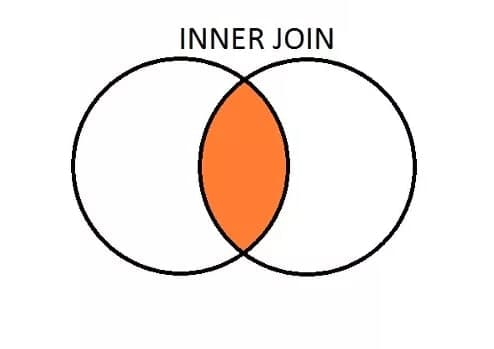

In [41]:
df = pd.merge(df1,df2,  on = ['Страховая_Регион', 'Регион'], how = 'inner').reset_index(drop=True)
df = df[df['Заключенные договора 2019'] != 0]
df['target'] = (df['Кол-во судов']) / (df['Заключенные договора 2019'])
df = df.reset_index(drop=True)
df

,Страховая_Регион,Регион,Кол-во судов,Unnamed: 0,Выплаты 2019,Заключенные договора 2019,Страховые премии 2019,target
0,"АО ""Тинькофф Страхование""",Владивосток,4,195,9490.85633,4359,25091.95518,0.000918
1,"АО ""Тинькофф Страхование""",Екатеринбург,5,2878,22402.62651,19402,125634.06797,0.000258
2,"АО ""Тинькофф Страхование""",Краснодар,178,57,39190.03329,19872,119853.62230,0.008957
3,"АО ""Тинькофф Страхование""",Москва,3,1945,460338.30854,68224,559408.35086,0.000044
4,"АО ""Тинькофф Страхование""",Московская область,11,2068,39933.56676,28002,222268.30879,0.000393
...,...,...,...,...,...,...,...,...
96,САО ЭРГО,Московская область,11,2129,15665.05804,742,8112.28552,0.014825
97,САО ЭРГО,Нижний Новгород,23,953,30114.02977,9312,66050.85506,0.002470
98,САО ЭРГО,Ростов,18,2719,61249.75237,7686,52415.60310,0.002342
99,САО ЭРГО,Санкт-Петербург,34,1802,66158.11895,4839,46509.62459,0.007026


In [29]:
df.shape[0]

101

# Данные для обучения модели готовы!



## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  


Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.


# Использование линейной регрессии из библиотеки Scikit-learn из Python

### Регрессионые параметры:
- Средняя страховая выплата для страховой в выбранном регионе
- Средняя страховая премия для страховой в выбранном регионе
- Регион судебного дела

### Целевой показатель:
- кол-во судебных дел / кол-во полисов 

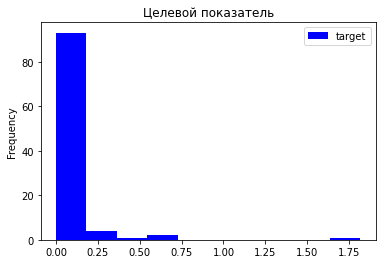

In [30]:
df.plot(y='target', kind='hist', 
           color='blue',  title='Целевой показатель')

## Зависимость target от выплат

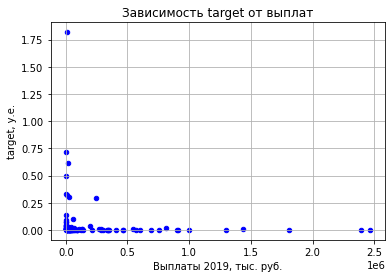

In [31]:
def scatter_h_w():
    ax = df.plot(x="Выплаты 2019", y="target",color = 'b', kind='scatter')
    ax.set_ylabel(u"target, у.е.")
    ax.set_xlabel(u"Выплаты 2019, тыс. руб.")
    ax.set_title(u"Зависимость target от выплат")
    ax.grid(True)
    return ax
scatter_h_w()

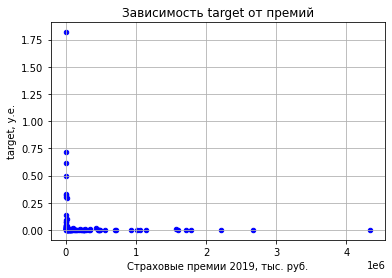

In [32]:
def scatter_h_w_1():
    ax = df.plot(x="Страховые премии 2019", y="target",color = 'b', kind='scatter')
    ax.set_ylabel(u"target, у.е.")
    ax.set_xlabel(u"Страховые премии 2019, тыс. руб.")
    ax.set_title(u"Зависимость target от премий")
    ax.grid(True)
    return ax
scatter_h_w_1()

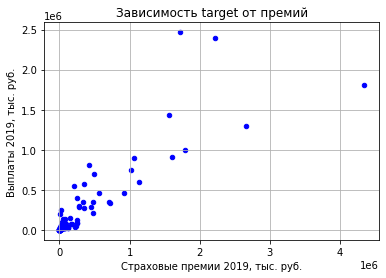

In [33]:
def scatter_h_w_3():
    ax = df.plot(x="Страховые премии 2019", y="Выплаты 2019",color = 'b', kind='scatter')
    ax.set_ylabel(u"Выплаты 2019, тыс. руб.")
    ax.set_xlabel(u"Страховые премии 2019, тыс. руб.")
    ax.set_title(u"Зависимость target от премий")
    ax.grid(True)
    return ax
scatter_h_w_3()

## Перевод региона из категориального признака в численный

In [37]:
df_tmp = df
df_tmp.head(10)

,Регион,Unnamed: 0,Выплаты 2019,Страховые премии 2019,target
0,Владивосток,195,9490.85633,25091.95518,0.000918
1,Екатеринбург,2878,22402.62651,125634.06797,0.000258
2,Краснодар,57,39190.03329,119853.62230,0.008957
3,Москва,1945,460338.30854,559408.35086,0.000044
4,Московская область,2068,39933.56676,222268.30879,0.000393
5,Нижний Новгород,880,22829.10317,65368.06277,0.000868
6,Ростов,2652,28658.62803,79817.91627,0.004030
7,Санкт-Петербург,1720,48712.50497,233608.27440,0.000383
8,Санкт-Петербург,1805,9470.78154,37413.68001,0.001997
9,Владивосток,196,568642.04478,349168.49960,0.002869


In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction import DictVectorizer as DV
df = df.drop(['Страховая_Регион'], axis = 1)
df = df.drop(['Кол-во судов'], axis = 1)
df = df.drop(['Заключенные договора 2019'], axis = 1)

labelencoder = LabelEncoder()
regions = df_tmp['Регион'].unique()
print(regions)

encoder = DV(sparse = False)
onehotencoder = OneHotEncoder([regions], handle_unknown='error', sparse=True)


encoded_data = encoder.fit_transform(df.T.to_dict().values())

['Владивосток' 'Екатеринбург' 'Краснодар' 'Москва' 'Московская область'
 'Нижний Новгород' 'Ростов' 'Санкт-Петербург']


In [43]:
df = pd.DataFrame(encoded_data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,195.0,0.000918,9490.85633,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25091.95518
1,2878.0,0.000258,22402.62651,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,125634.06797
2,57.0,0.008957,39190.03329,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,119853.62230
3,1945.0,0.000044,460338.30854,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,559408.35086
4,2068.0,0.000393,39933.56676,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,222268.30879


В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки. 

**[6].** Напишем функцию, которая по трём параметрам $w_0$, $w_1$,  $w_2$ и $w_3$ вычисляет квадратичную ошибку приближения зависимости target $y$ от 3-х параметров $x$ гиперплоскостью $y = w_0 + w_1 * x1 + w2 * x2 + w3 * x3$:
$$error(w_0, w_1, w_2, w_3) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_{i1} + w_2 * x_{i2} + w_3 * x_{i3}))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – target и вектор признаков $i$-ой страховой в регионе. 

## Разбивка выборки на обучение и тест

In [48]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(df) 
#df = scaler.transform(df)

X = np.array(df[list(range(1, 11))])
y = np.array(df[0])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X,y

(array([[9.17641661e-04, 9.49085633e+03, 1.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.57705391e-04, 2.24026265e+04, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [8.95732689e-03, 3.91900333e+04, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [2.34192037e-03, 6.12497524e+04, 0.00000000e+00, ...,
         0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
        [7.02624509e-03, 6.61581190e+04, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
        [8.49575212e-03, 3.29213291e+04, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([ 195., 2878.,   57., 1945., 2068.,  880., 2652., 1720., 1805.,
         196., 2879.,   58., 1949., 2069.,  881., 2653., 1721., 1806.,
        2881.,   60., 1951., 2071.,  883., 2655., 1723., 1808.,  202.,
        2885.,   64., 1956., 2075.,  887., 2658., 17

## Обучение

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


linear_regression_model = LinearRegression(normalize = True, n_jobs = -1)
linear_regression_model.fit(X_train, y_train)
y_pred = linear_regression_model.predict(X_test)
mse = mean_squared_error(y_pred, y_test) 


#model = LinearRegression(normalize = True, n_jobs = -1)
#model.fit(X_train, y_train)

## Оценка качества модели

In [50]:
from sklearn import metrics 
#y_pred = model.predict(X_test)

In [51]:
print(y_pred)
print(y_test)

[  86. 2688. 1770. 1777. 2002. 2879.  910.  911. 2090. 2688. 2005.  903.
  908. 2899.   90.   88. 2006.   88. 2005.   88. 1774.]
[ 126. 2701. 1806. 1854. 1962. 2946.  907.  945. 2122. 2667. 2065.  895.
  887. 2952.   84.   69. 1989.   86. 2054.  118. 1728.]


In [52]:
mse = ((y_pred-y_test)**2).mean()
mae = abs(y_pred-y_test).mean()
print("MSE = ", mse)
print("MSE / mean_y = ", mse / y_test.mean())
print("MAE = ", mae)

MSE =  1463.5238095238096
MSE / mean_y =  0.9926040758324454
MAE =  32.095238095238095


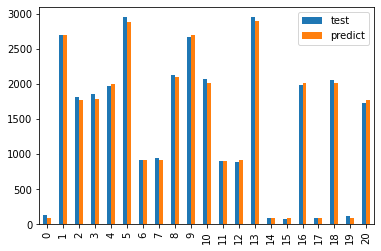

In [53]:
data = {'test': y_test,
        'predict': y_pred}
res = pd.DataFrame(data)
res.plot(kind='bar')
plt.show()

## Вывод:
Гипотеза не верна, поскольку слишком большая неточность на тестовой выборке. 
## Причины
1) Неверное предположение о взаимосвязи параметров

2) Маленький объём выборки

3) Почти отсутствующие данные о страховых премиях(для многих страховых указаны 0)